# Exercise 03

Discussion 03

https://docs.google.com/document/d/1gAncebA0cK6Nt7G7kfeLGF8kYokTPnxORg1YpBvpT1w/edit?tab=t.0

## Team 1
 - Alison Jarvis
 - Brent Thorne
 - Jehad Saif
 - Amala Vellappillil Biju
 - Andrea Kim
 - Jahnavi Gandhi
 - Yejin Yang

## Setup

### Mathematical Foundations:

**Correlation:**
$$
\mathrm{corr}(x,y)
\triangleq \frac
{ \mathrm{cov}(x,y) }
{ \sqrt{\mathrm{var}{x} \mathrm{var}(y)} }
$$

**Variance:**
$$
\mathrm{var(x)}
\equiv \sigma_x^2
\triangleq \sum_{i}^N (x_i - \mu_x)^2
$$

**Covariance:**
$$
\mathrm{cov}(x,y) \triangleq \sum_j^M \sum_i^N (x_i - \mu_x) (y_j - \mu_y)
$$

**Total Variance:**
$$
\sigma_{tot}^2= \sigma_x^2 + \sigma_y^2 + 2 \mathrm{cov}(x,y)
$$

**Expectation-based Covariance:**
$$
\mathrm{con}(x_1,x_2)= E[x_1 x_2] - E[x_1] E[x_2]
$$

**Pearson Correlation Coefficient:**
$$
\rho(x_1,x_2) =
\frac{\mathrm{cov}(x_1,x_2)}
{\sqrt{\sigma_{11}^2 \sigma_{22}^2}}
$$

### Goal: 

Obtain a deeper understanding of **Expectation-based Covariance** and **Pearson Correlation Coefficient**.

### Task:

Generare two data sets $x_1$ and $x_2$ randomly for different:
 - noise level
 - different distributions
 - different functions $f$ where $x_2=f(x_1)$

For example:
 - `x1 = np.random.uniform(0,5,(1000,))`
 - `x2 = np.sqrt(x1)`

Summarize your result including plots, discuss how $\mathrm{cov}(x_1,x_2)$ and $\rho(x_1,x_2)$ depend on the different settings.

Analysis Goals: (we define our own learning objectives. ;-)
 - compute and compare; covariance and correlation
 - plot $x_1$ vs $x_2$
 - explore sensitivity to:
     - function nonlinearity
     - noise injection
     - distributional skewness
     - scaling effects

### How:

5 teams and separate breakout rooms:
 1) four completely different functions $f$ where $x_2 = f(x_1)$, low noise level
 2) a linear function, but for 5 different slopes (including neg), low noise level
 3) a linear function, 5 different noise levels, slope of 1
 4) different distributions to generate the data (normal, poisson, uniform etc)
 5) 5 different scaling factors $\alpha$ where $x_1 \rightarrow \alpha x_1$, two different distributions, low
noise

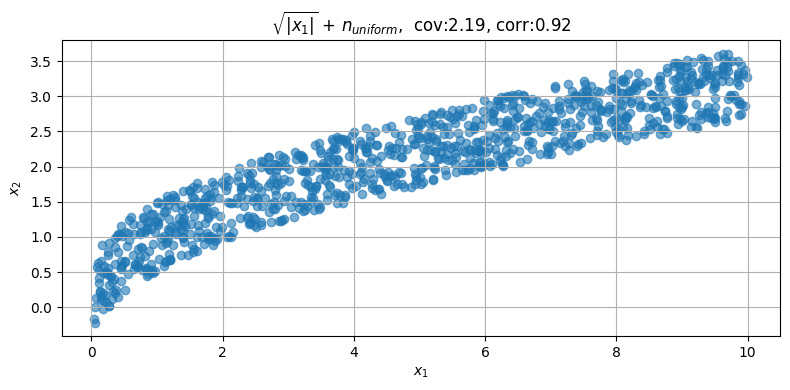

In [1]:
# Let's get started
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # for reproducibility

# samples
n_vals = 1000

# our funciton
f = lambda x: np.sqrt(np.abs(x)) # nonlinear function

# make some noise
scale = 10
noise = 1
# define domain and resolution
x_vals = np.linspace(0, scale, n_vals)

x1 = np.random.uniform(0, scale, size=n_vals)
x2 = f(np.abs(x1)) + np.random.uniform(-noise/2, +noise/2, size=n_vals) # dependent
y = f(x_vals)
#x2 = np.random.uniform(0, noise, size=n_vals) # independent

# metrics
cov = np.cov(x1, x2)[0, 1]
corr = np.corrcoef(x1, x2)[0, 1]

#print(f"cov:{cov}, corr:{corr}")

# plot like a villain
plt.figure(figsize=(8, 4))
plt.scatter(x1, x2, alpha=0.6)
#plt.plot(x_vals, y)

plt.title(r"$\sqrt{|x_1|}$ + $n_{uniform}$" + f",  cov:{cov:.2f}, corr:{corr:.2f}")
#plt.title(r"uniform")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Get Abstract

code cleanup and abstraction

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_dependence(
    f=None,
    dist_x1="uniform",
    dist_x2="function",
    noise_level=0.1,
    scale=1.0,
    n_vals=400,
    title="",
    seed=42
):
    np.random.seed(seed)

    # generate x1
    if dist_x1 == "uniform":
        x1 = np.random.uniform(0, scale, size=n_vals)
    elif dist_x1 == "normal":
        x1 = np.random.normal(0, scale, size=n_vals)
    elif dist_x1 == "poisson":
        x1 = np.random.poisson(scale, size=n_vals)
    else:
        raise ValueError("Unsupported distribution for x1")

    # generate x2
    if dist_x2 == "uniform":
        n = np.random.uniform(-noise_level/2, noise_level/2, size=n_vals)
    elif dist_x2 == "normal":
        n = np.random.normal(-noise_level/2, noise_level/2, size=n_vals)
    elif dist_x2 == "poisson":
        n = np.random.poisson(noise_level, size=n_vals)
    else:
        raise ValueError("Unsupported distribution for x2")
 
    x2 = f(x1) + n

    # compute metrics
    mu_x1 = np.mean(x1)
    mu_x2 = np.mean(x2)
    var_x1 = np.var(x1)
    var_x2 = np.var(x2)
    cov = np.cov(x1, x2)[0, 1]
    corr = np.corrcoef(x1, x2)[0, 1]

    # plot x1 vs x2
    plt.figure(figsize=(8, 4))
    plt.scatter(x1, x2, alpha=0.6, label="samples")

    # plot function
    x_smooth = np.linspace(np.min(x1), np.max(x1), 500) # think about this
    plt.plot(x_smooth, f(x_smooth), color="darkorange", label="f(x1)", linewidth=2)

    plt.title(f"{title}\n Cov: {cov:.3f}, Corr: {corr:.3f}", fontsize=14)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "mean_x1": mu_x1,
        "mean_x2": mu_x2,
        "var_x1": var_x1,
        "var_x2": var_x2,
        "cov": cov,
        "corr": corr
    }

## Dependence and Independence

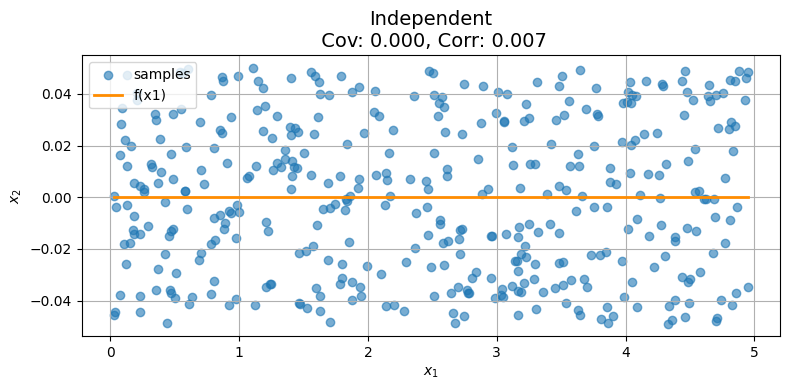

{'mean_x1': np.float64(2.4709534226068888),
 'mean_x2': np.float64(-2.7803349771581e-05),
 'var_x1': np.float64(2.1519255929424332),
 'var_x2': np.float64(0.0008610217802716812),
 'cov': np.float64(0.00029241554852676543),
 'corr': np.float64(0.006776300733474977)}

In [3]:
analyze_dependence(
    f=lambda x: x*0,
    dist_x1="uniform",
    dist_x2="uniform",
    noise_level=0.1,
    scale=5.0,
    title=r"Independent"
)

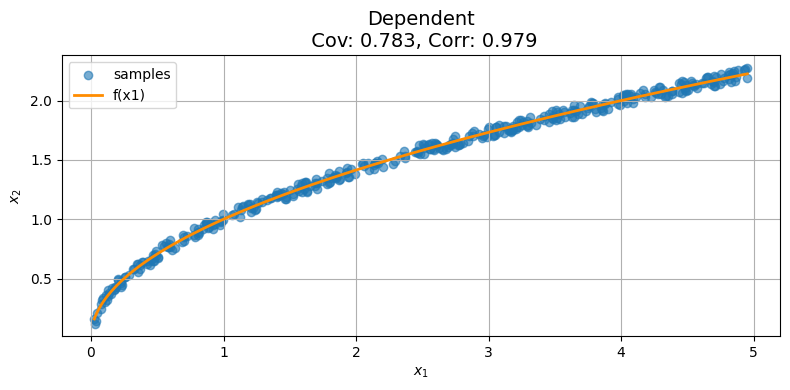

{'mean_x1': np.float64(2.4709534226068888),
 'mean_x2': np.float64(1.4752481022762118),
 'var_x1': np.float64(2.1519255929424332),
 'var_x2': np.float64(0.29550293967380703),
 'cov': np.float64(0.782841297721809),
 'corr': np.float64(0.97924667235854)}

In [4]:
analyze_dependence(
    f=lambda x: np.sqrt(x),
    dist_x1="uniform",
    dist_x2="uniform",
    noise_level=0.1,
    scale=5.0,
    title=r"Dependent"
)

## Different Distributions

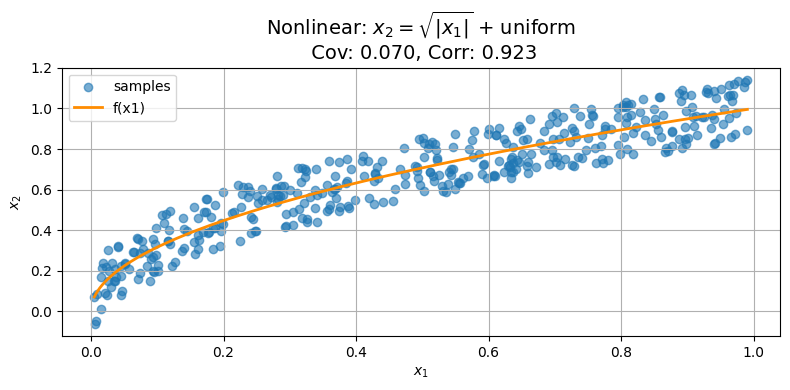

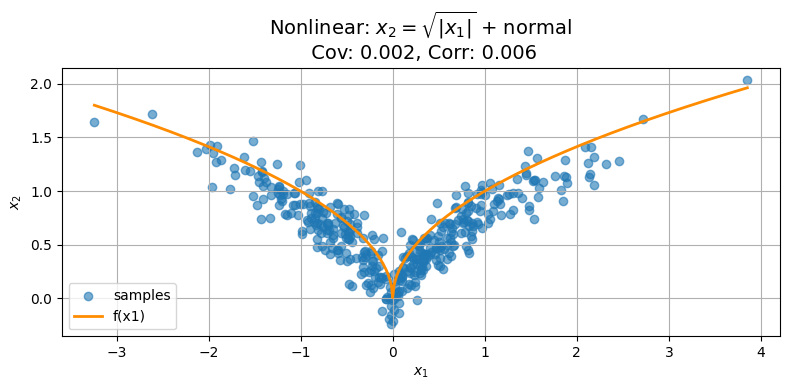

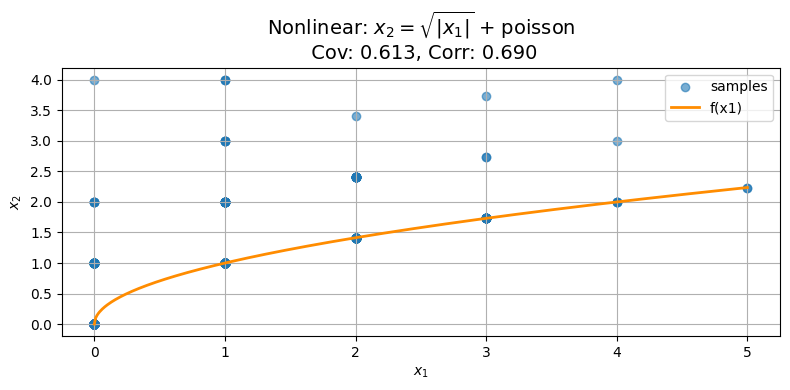

In [5]:
dists = ["uniform", "normal", "poisson"]

for dist in dists:
    analyze_dependence(
        f=lambda x: np.sqrt(np.abs(x)),
        dist_x1=dist,
        dist_x2=dist,
        noise_level=0.3,
        scale=1.0,
        title=r"Nonlinear: $x_2 = \sqrt{|x_1|}$ + " + dist
    )

## Linear Functions

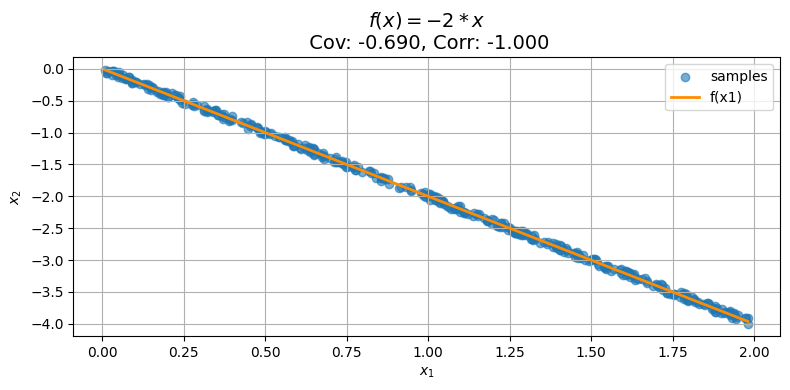

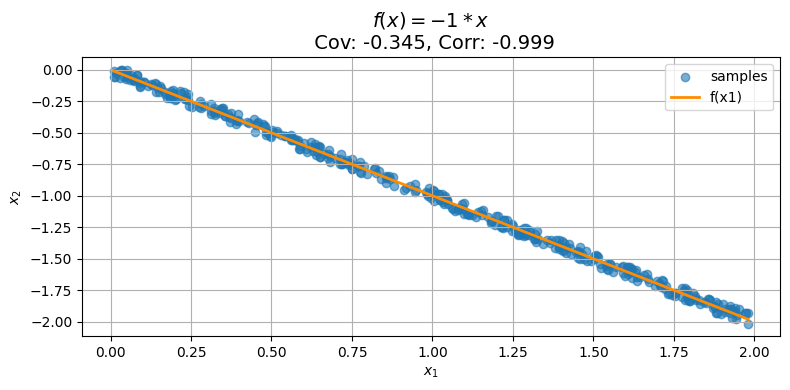

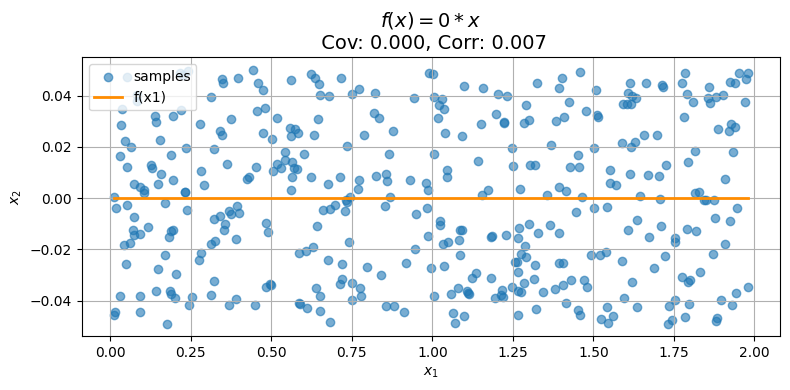

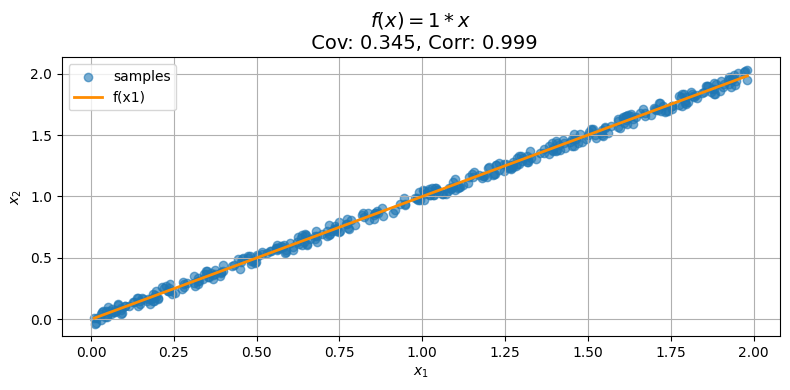

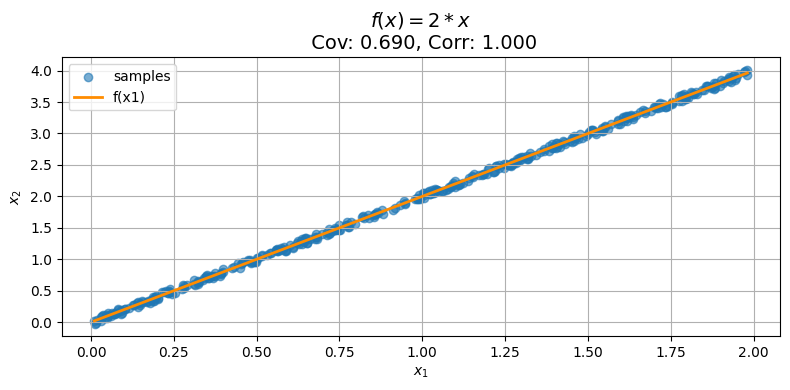

In [9]:
# five linear functions of vaious slopes
linear_functions = {
    r"$f(x)=-2 * x$": lambda x: -2 * x,
    r"$f(x)=-1 * x$": lambda x: -1 * x,
    r"$f(x)= 0 * x$": lambda x: 0 * x,
    r"$f(x)= 1 * x$": lambda x: 1 * x,
    r"$f(x)= 2 * x$": lambda x: 2 * x
}

for name, func in linear_functions.items():
    analyze_dependence(
        f=func,
        dist_x1="uniform",
        dist_x2="uniform",
        noise_level=0.1,
        scale=2.0,
        title=name
    )

## Non-Linear Fucnctions

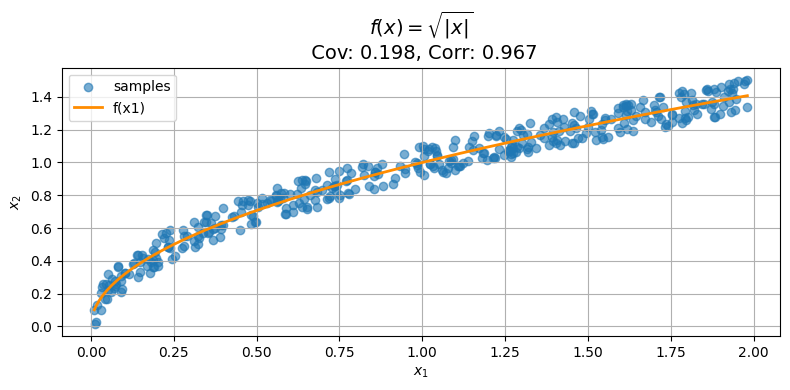

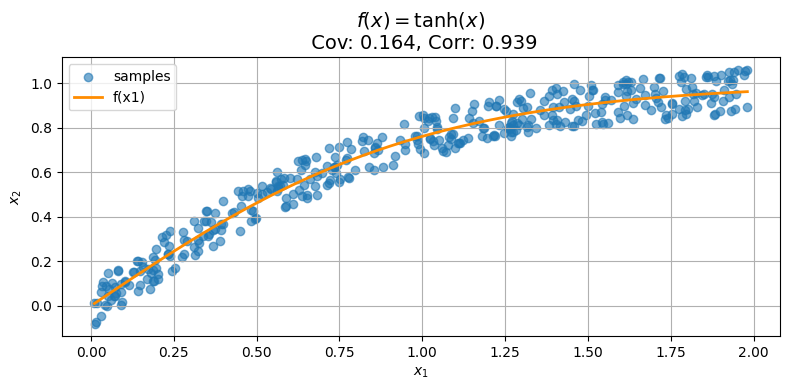

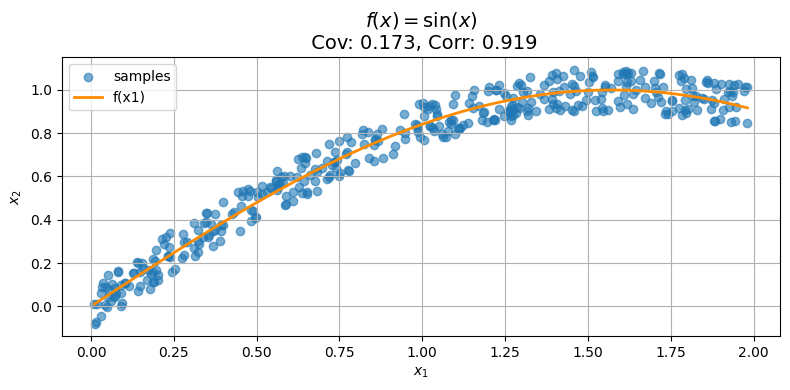

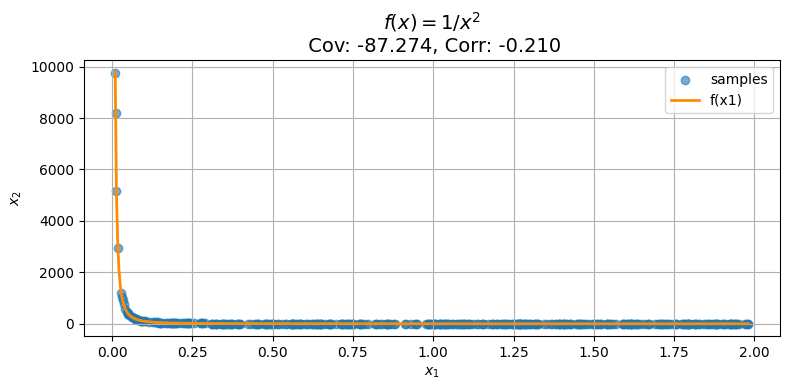

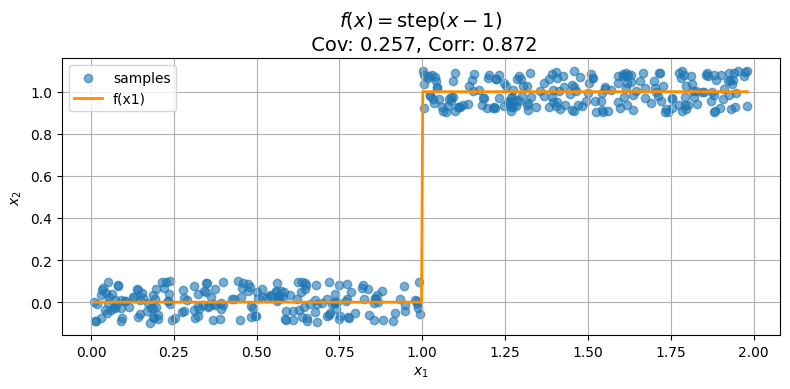

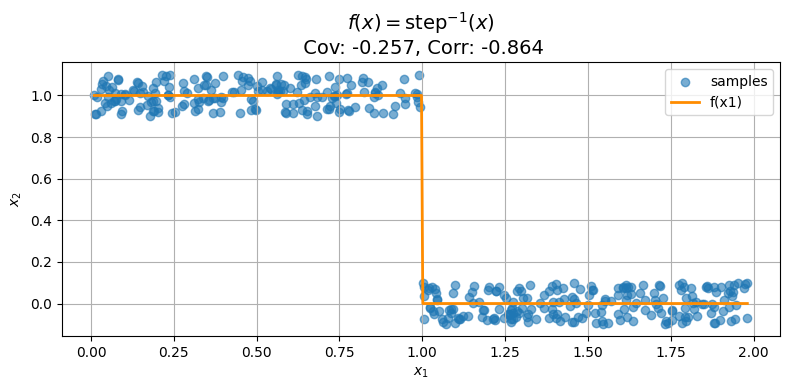

In [10]:
nonlinear_functions = {
    r"$f(x) = \sqrt{|x|}$": lambda x: np.sqrt(np.abs(x)),  # curvature, monotonic
    r"$f(x) = \tanh(x)$": lambda x: np.tanh(x),           # saturation, bounded
    r"$f(x) = \sin(x)$": lambda x: np.sin(x),            # periodic, oscillatory
    r"$f(x) =  1/x^2$": lambda x: 1/(x**2),             # saturation, bounded
    r"$f(x) = \mathrm{step}(x-1)$": lambda x: (x-1 > 0).astype(float),  # discontinuous
    r"$f(x) = \mathrm{step^{-1}}(x)$": lambda x: (x < 1).astype(float)  # discontinuous
}

for name, func in nonlinear_functions.items():
    analyze_dependence(
        f=func,
        dist_x1="uniform",
        dist_x2="uniform",
        noise_level=0.2,
        scale=2, #*np.pi,
        title=name
    )

Resources:

https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf